<a href="https://colab.research.google.com/github/mrinal3017/FVA/blob/main/FVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 1.jpg to 1.jpg
Saving 1copy.jpg to 1copy.jpg
Images uploaded: ['1.jpg', '1copy.jpg']
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 386ms/step - accuracy: 0.0000e+00 - loss: 0.8072 - val_accuracy: 1.0000 - val_loss: 0.7337
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0000e+00 - loss: 6.2971 - val_accuracy: 1.0000 - val_loss: 2.1540
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1083 - loss: 8.8541 - val_accuracy: 1.0000 - val_loss: 2.1649
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2472 - loss: 8.4113 - val_accuracy: 1.0000 - val_loss: 2.2310
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0667 - loss: 7.4841 - val_accuracy: 1.0000 - val_loss: 2.8927
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5778 - loss: 8.1760 - val_accuracy: 1.0000 - val_loss: 2.9157
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 7.3457 - val_accuracy: 1.0000 - val_loss: 2.9378
Epoch 8/10
5/5 ━━━━━

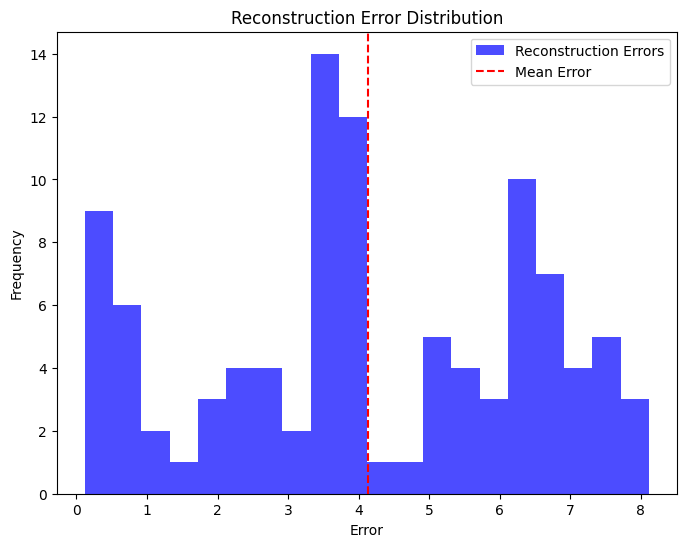

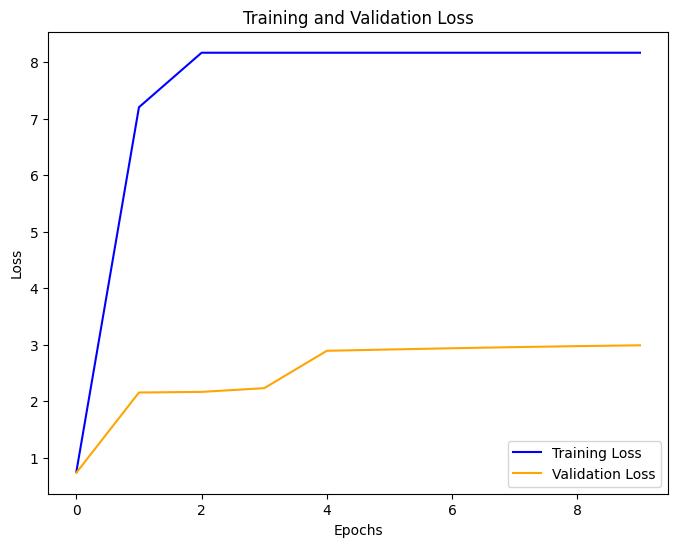

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


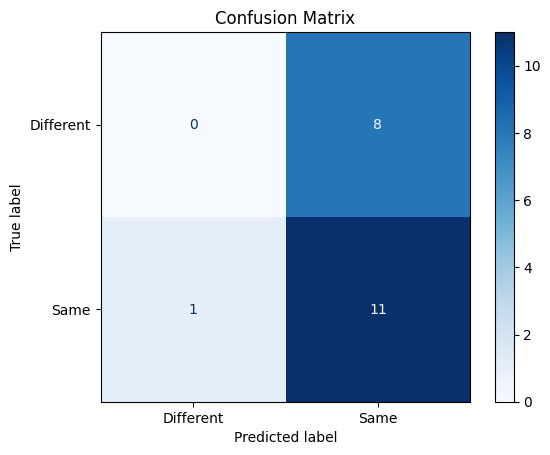

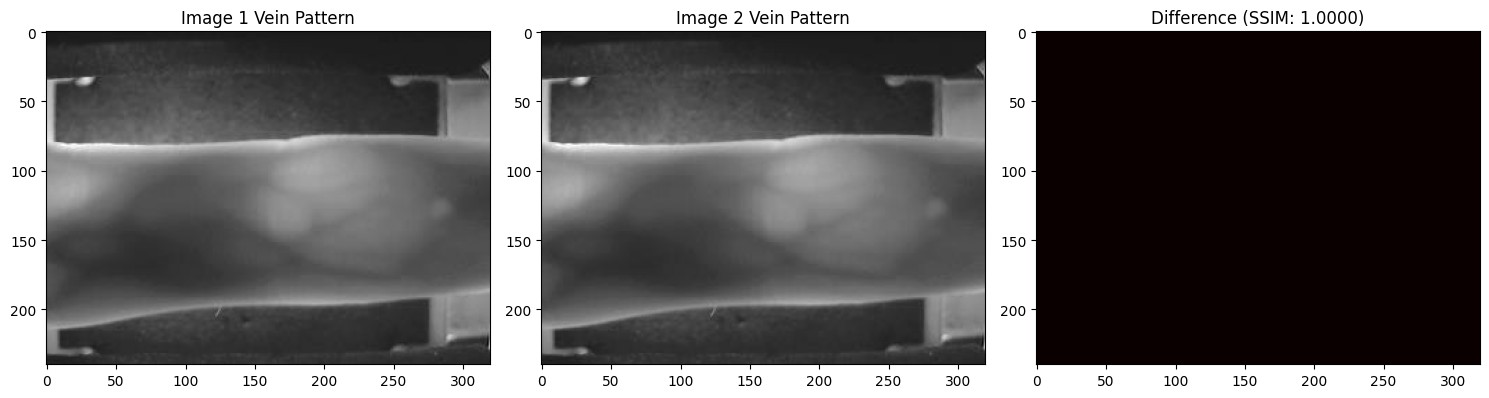

SSIM Score (Similarity): 1.0000
The images belong to same person.


In [ ]:
# --- Import necessary libraries ---
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from google.colab import files
from skimage.metrics import structural_similarity as compare_ssim

# --- Step 1: Image Acquisition (Upload two images for authentication) ---
uploaded = files.upload()  # Upload two images for authentication
authentication_images = list(uploaded.keys())  # Get the file names

if len(authentication_images) != 2:
    print("Please upload exactly two images.")
else:
    print(f"Images uploaded: {authentication_images}")

# --- Step 2: Image Preprocessing ---
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = img / 255.0
    img = cv2.resize(img, (128, 128))
    return img.reshape(128, 128, 1)

preprocessed_image1 = preprocess_image(authentication_images[0])
preprocessed_image2 = preprocess_image(authentication_images[1])

# --- Step 3: Feature Extraction (Siamese Network) ---
input_shape = (128, 128, 1)
input_img = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
encoded = Dense(128, activation='relu')(x)

encoder_model = Model(input_img, encoded)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)
encoded_a = encoder_model(input_a)
encoded_b = encoder_model(input_b)
distance = Lambda(lambda x: tf.sqrt(tf.reduce_sum(tf.square(x[0] - x[1]), axis=-1)))([encoded_a, encoded_b])

siamese_net = Model(inputs=[input_a, input_b], outputs=distance)

# Compile Siamese Network
siamese_net.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# --- Step 4: Simulated Training (for demo purposes) ---
# Dummy data for demonstration
X1 = np.random.rand(100, 128, 128, 1)
X2 = np.random.rand(100, 128, 128, 1)
y = np.random.randint(0, 2, size=(100,))

history = siamese_net.fit([X1, X2], y, epochs=10, batch_size=16, validation_split=0.2)

# --- Step 5: Visualization ---
# Plot reconstruction error distribution
plt.figure(figsize=(8, 6))
errors = np.abs(y - siamese_net.predict([X1, X2]).reshape(-1))
plt.hist(errors, bins=20, alpha=0.7, color='blue', label='Reconstruction Errors')
plt.axvline(x=np.mean(errors), color='red', linestyle='--', label='Mean Error')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# --- Step 6: Confusion Matrix ---
# Generate predictions for a simulated test set
test_X1 = np.random.rand(20, 128, 128, 1)
test_X2 = np.random.rand(20, 128, 128, 1)
test_y = np.random.randint(0, 2, size=(20,))

predictions = siamese_net.predict([test_X1, test_X2]).reshape(-1)
predictions_binary = (predictions > 0.5).astype(int)

conf_matrix = confusion_matrix(test_y, predictions_binary)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Different", "Same"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# --- Optional: Display the Images and Compare ---
def display_images(image1_path, image2_path):
    img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
    ssim_score, diff = compare_ssim(img1, img2, full=True)
    diff = (diff * 255).astype("uint8")
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Image 1 Vein Pattern")
    plt.imshow(img1, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title("Image 2 Vein Pattern")
    plt.imshow(img2, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title(f"Difference (SSIM: {ssim_score:.4f})")
    plt.imshow(thresh, cmap='hot')
    plt.tight_layout()
    plt.show()

    print(f"SSIM Score (Similarity): {ssim_score:.4f}")
    if ssim_score < 1.0:
        print("The images belong to different person.")
    else:
        print("The images belong to same person.")

display_images(authentication_images[0], authentication_images[1])

Saving 1copy.jpg to 1copy (1).jpg
Saving 2.jpg to 2.jpg
Images uploaded: ['1copy (1).jpg', '2.jpg']
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.0000e+00 - loss: 0.7852 - val_accuracy: 0.0000e+00 - val_loss: 0.6555
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6611 - loss: 4.9813 - val_accuracy: 0.0000e+00 - val_loss: 0.5956
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0000e+00 - loss: 6.6079 - val_accuracy: 0.0000e+00 - val_loss: 0.5536
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1083 - loss: 7.4204 - val_accuracy: 0.0000e+00 - val_loss: 0.5401
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0000e+00 - loss: 8.5275 - val_accuracy: 0.0000e+00 - val_loss: 0.5349
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 7.9878 - val_accuracy: 0.0000e+00 - val_loss: 0.5330
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5889 - loss: 7.7387 - val_accuracy: 0.0000e+00

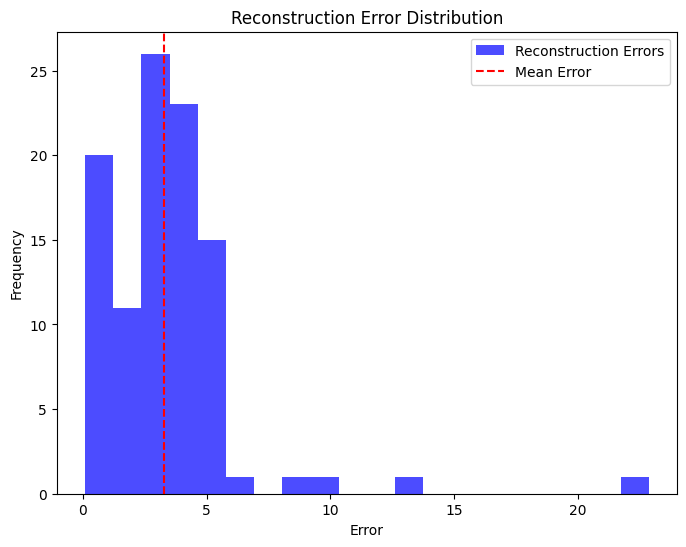

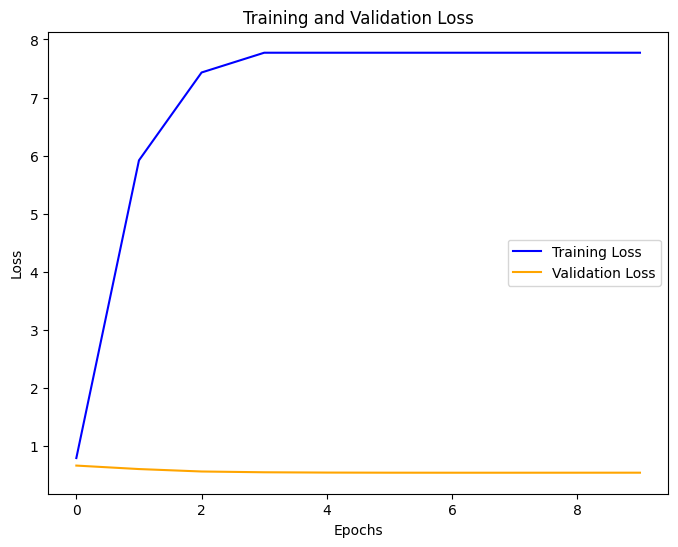

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


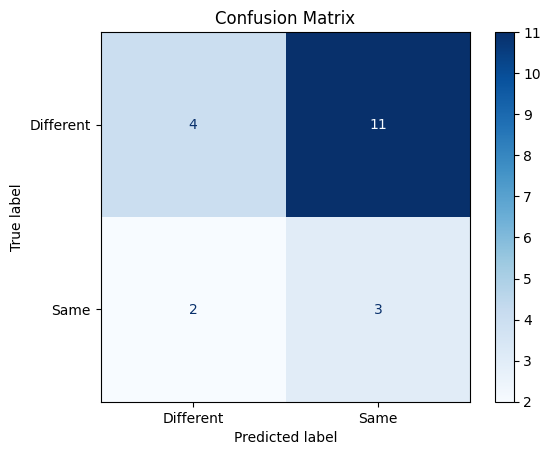

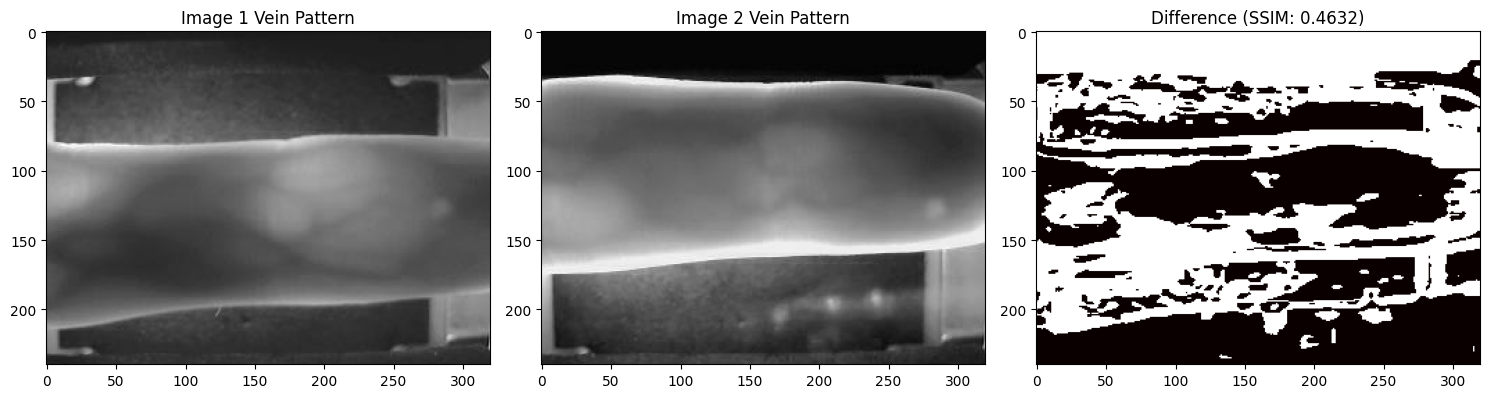

SSIM Score (Similarity): 0.4632
The images belong to different person.


In [ ]:
# --- Import necessary libraries ---
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from google.colab import files
from skimage.metrics import structural_similarity as compare_ssim

# --- Step 1: Image Acquisition (Upload two images for authentication) ---
uploaded = files.upload()  # Upload two images for authentication
authentication_images = list(uploaded.keys())  # Get the file names

if len(authentication_images) != 2:
    print("Please upload exactly two images.")
else:
    print(f"Images uploaded: {authentication_images}")

# --- Step 2: Image Preprocessing ---
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = img / 255.0
    img = cv2.resize(img, (128, 128))
    return img.reshape(128, 128, 1)

preprocessed_image1 = preprocess_image(authentication_images[0])
preprocessed_image2 = preprocess_image(authentication_images[1])

# --- Step 3: Feature Extraction (Siamese Network) ---
input_shape = (128, 128, 1)
input_img = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
encoded = Dense(128, activation='relu')(x)

encoder_model = Model(input_img, encoded)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)
encoded_a = encoder_model(input_a)
encoded_b = encoder_model(input_b)
distance = Lambda(lambda x: tf.sqrt(tf.reduce_sum(tf.square(x[0] - x[1]), axis=-1)))([encoded_a, encoded_b])

siamese_net = Model(inputs=[input_a, input_b], outputs=distance)

# Compile Siamese Network
siamese_net.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# --- Step 4: Simulated Training (for demo purposes) ---
# Dummy data for demonstration
X1 = np.random.rand(100, 128, 128, 1)
X2 = np.random.rand(100, 128, 128, 1)
y = np.random.randint(0, 2, size=(100,))

history = siamese_net.fit([X1, X2], y, epochs=10, batch_size=16, validation_split=0.2)

# --- Step 5: Visualization ---
# Plot reconstruction error distribution
plt.figure(figsize=(8, 6))
errors = np.abs(y - siamese_net.predict([X1, X2]).reshape(-1))
plt.hist(errors, bins=20, alpha=0.7, color='blue', label='Reconstruction Errors')
plt.axvline(x=np.mean(errors), color='red', linestyle='--', label='Mean Error')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# --- Step 6: Confusion Matrix ---
# Generate predictions for a simulated test set
test_X1 = np.random.rand(20, 128, 128, 1)
test_X2 = np.random.rand(20, 128, 128, 1)
test_y = np.random.randint(0, 2, size=(20,))

predictions = siamese_net.predict([test_X1, test_X2]).reshape(-1)
predictions_binary = (predictions > 0.5).astype(int)

conf_matrix = confusion_matrix(test_y, predictions_binary)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Different", "Same"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# --- Optional: Display the Images and Compare ---
def display_images(image1_path, image2_path):
    img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
    ssim_score, diff = compare_ssim(img1, img2, full=True)
    diff = (diff * 255).astype("uint8")
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Image 1 Vein Pattern")
    plt.imshow(img1, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title("Image 2 Vein Pattern")
    plt.imshow(img2, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title(f"Difference (SSIM: {ssim_score:.4f})")
    plt.imshow(thresh, cmap='hot')
    plt.tight_layout()
    plt.show()

    print(f"SSIM Score (Similarity): {ssim_score:.4f}")
    if ssim_score < 1.0:
        print("The images belong to different person.")
    else:
        print("The images belong to same person.")

display_images(authentication_images[0], authentication_images[1])